<h1 style="color:orange">EXERCISE CLASS 2 (Part 3/3)</h1>

# Hypothesis testing in the presence of two samples



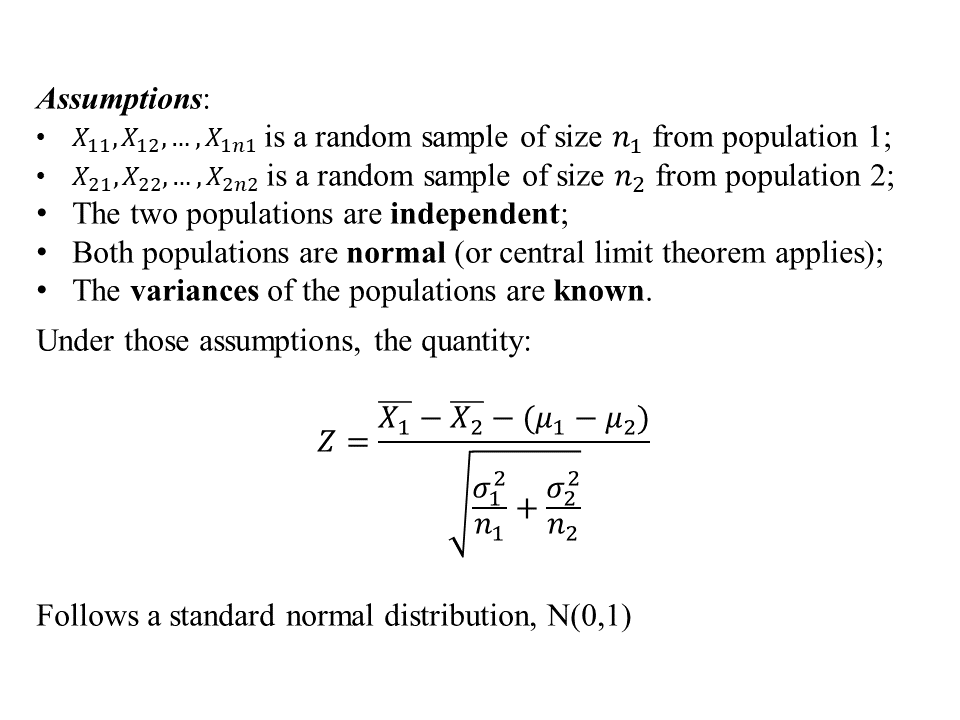

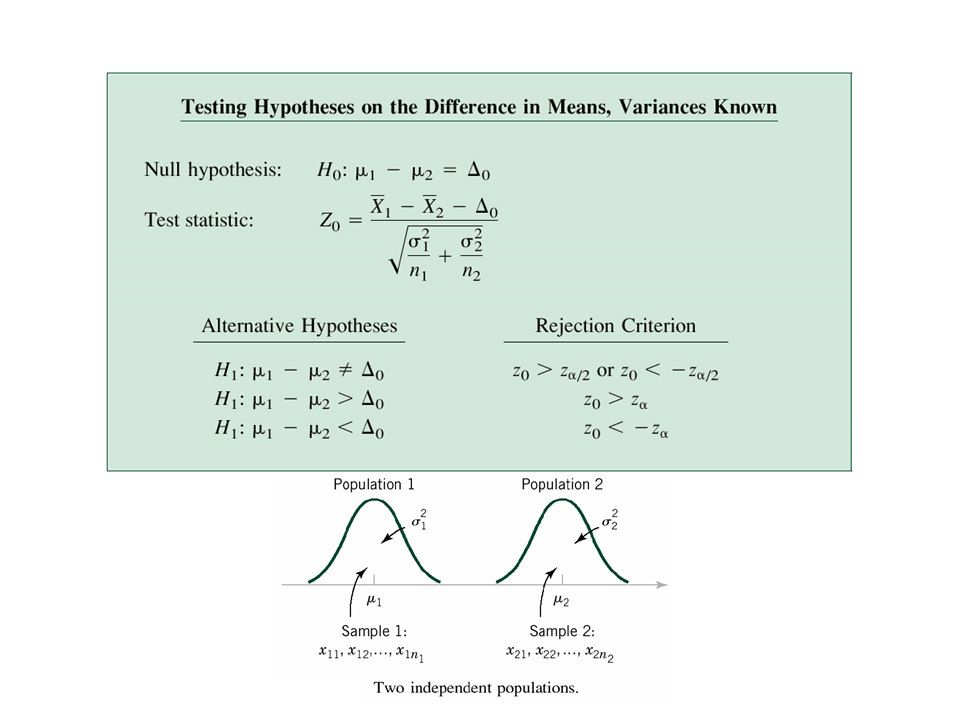

Two-sample z test - confidence interval

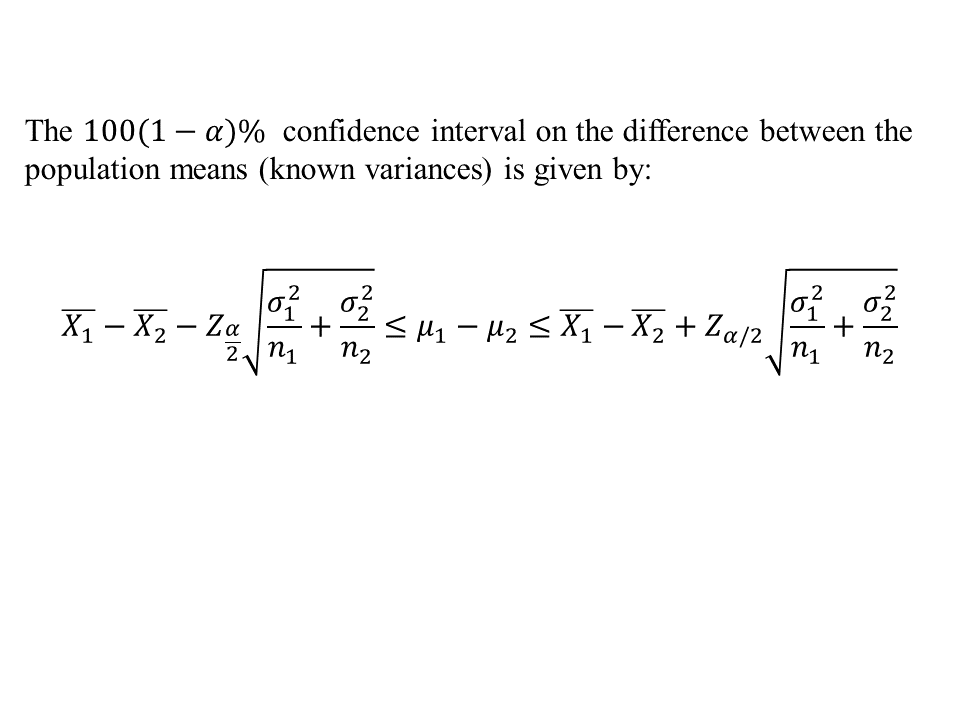


# Two-sample t-test

#### The case of equal but unknown variances

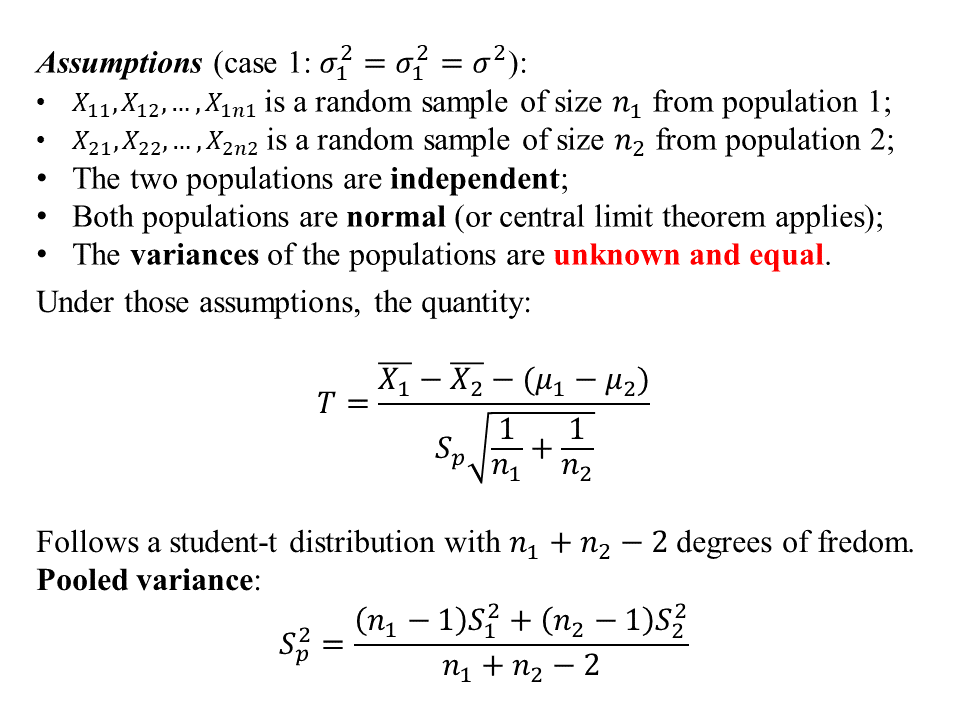

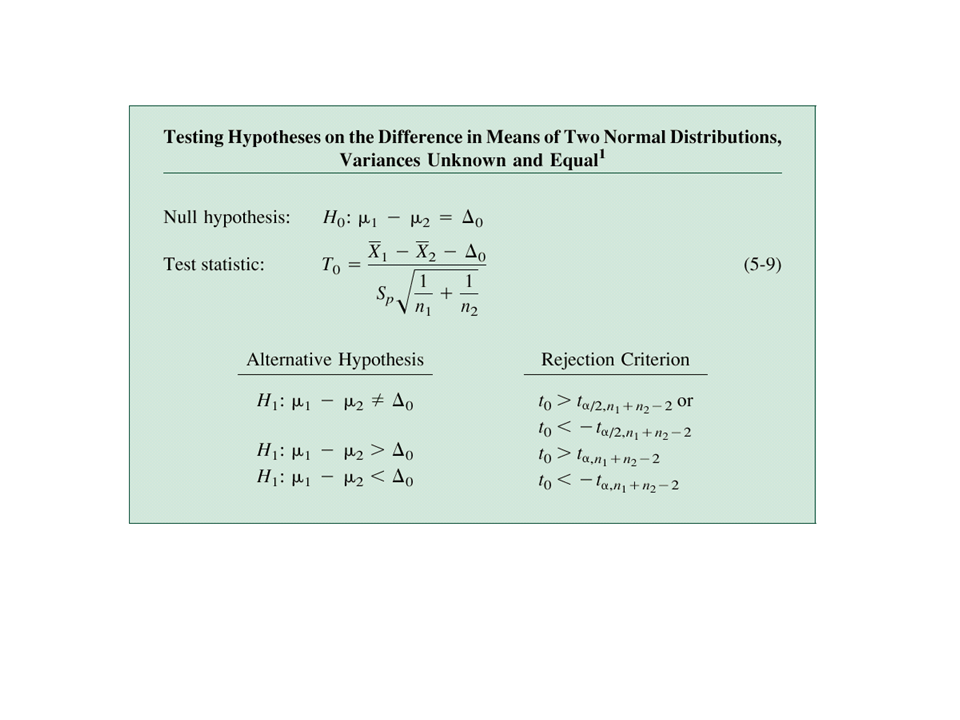

# Two-sample t-test

#### The case of non-equal and unknown variances

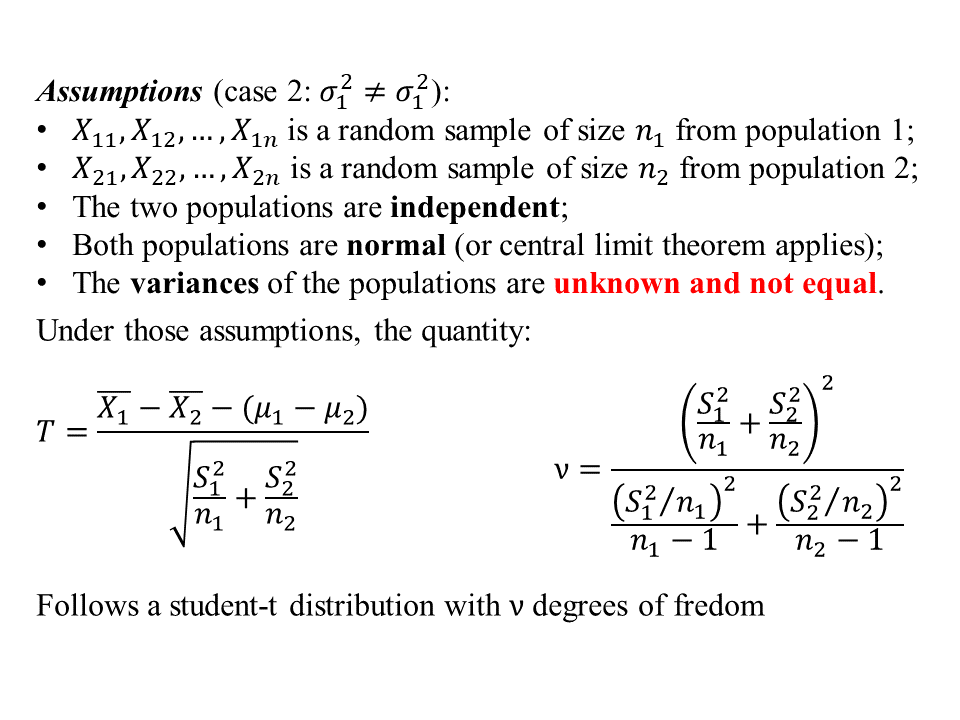


# Paired t-test

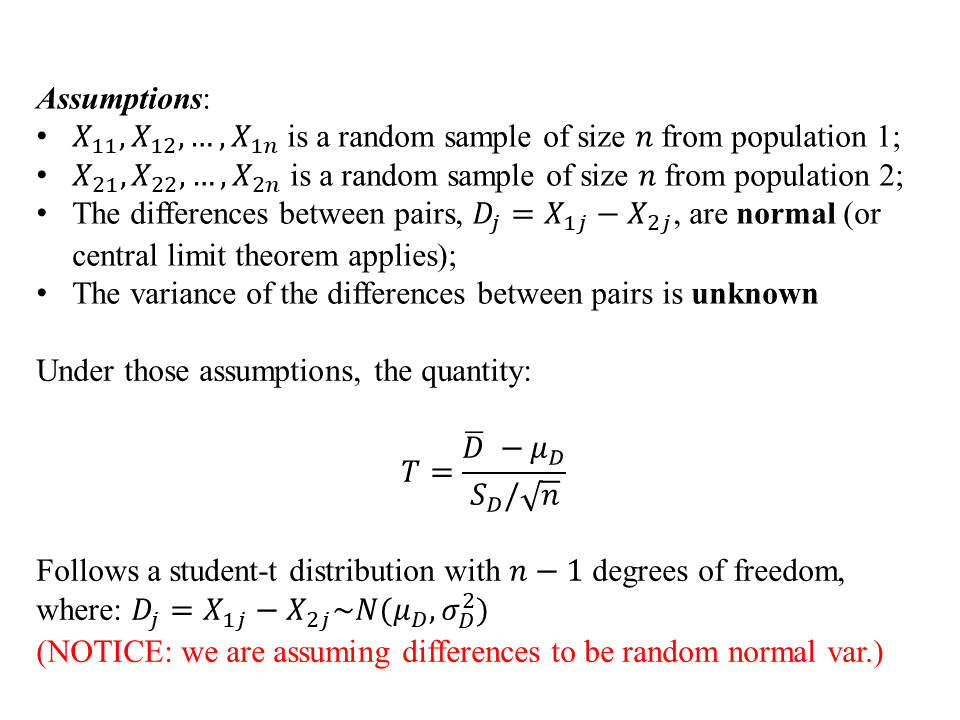

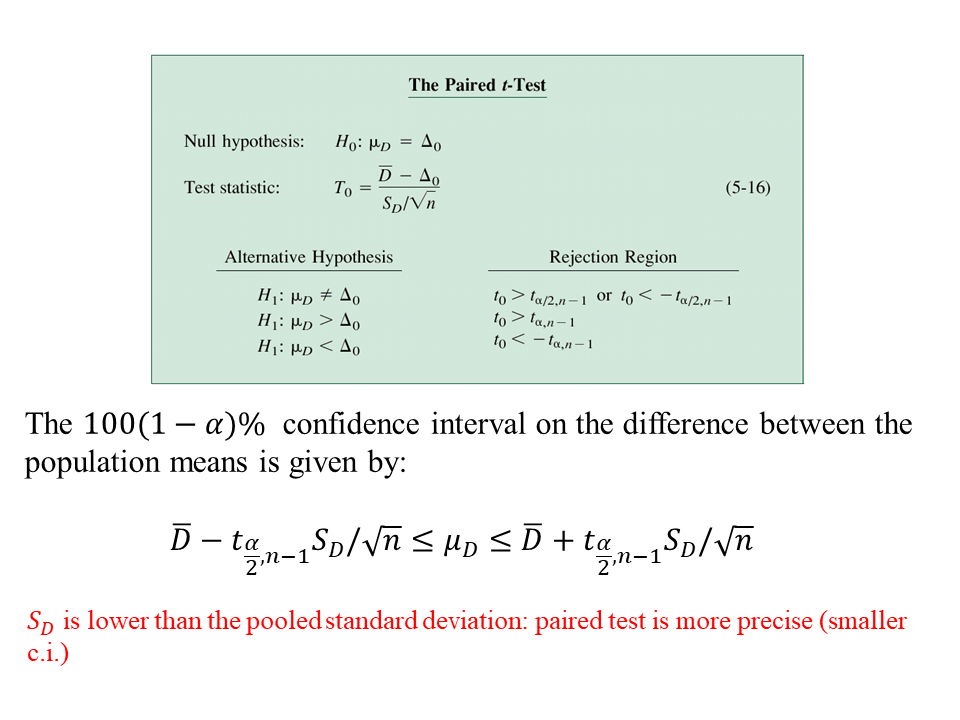

## EXERCISE 3

Ten people are involved in a diet program. The weights before and after the program is reported in the table (expressed in pounds, 1 lb =0.454). The data is stored in the file `ESE2_ex3.csv`.

a) Is there statistical evidence (95%) to state that the diet program was effective?

b) Can we state that (95%) the program yielded a mean weigth reduction higher than 10 lb?

c) Design a two-sided confidence interval at 95% on the weight difference

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE2_ex3.csv')

# Inspect the dataset
data.head()

,before,after,d
0,195,187,8
1,213,195,18
2,247,221,26
3,201,190,11
4,187,175,12


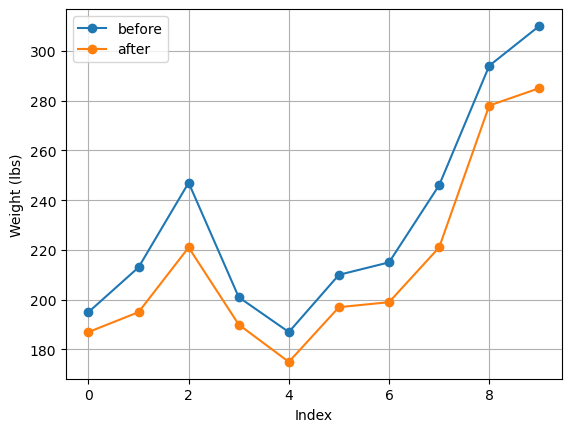

In [2]:
# Let's plot the data first
plt.plot(data['before'], 'o-', label='before')
plt.plot(data['after'], 'o-', label='after')
plt.xlabel('Index')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.grid()
plt.show()

### Point a

Is there statistical evidence (95%) to state that the diet program was effective?

> ### Solution
>
> Data are PAIRED, so we are interested in the difference between the two. 


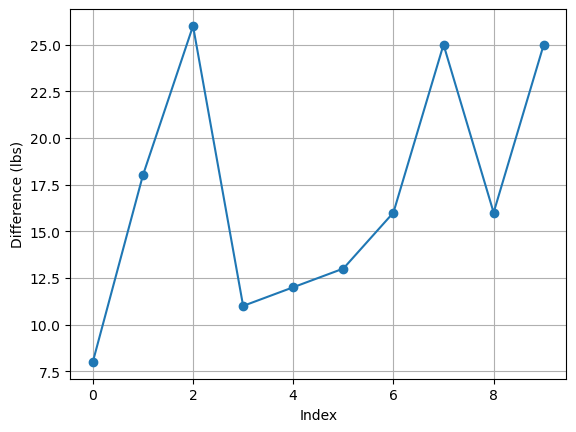

In [3]:
# Plot the difference d
plt.plot(data['d'], 'o-')
plt.xlabel('Index')
plt.ylabel('Difference (lbs)')
plt.grid()
plt.show()

> Let's check the normality of the data with the Shapiro-Wilk test. 

p-value of the Shapiro-Wilk test: 0.270


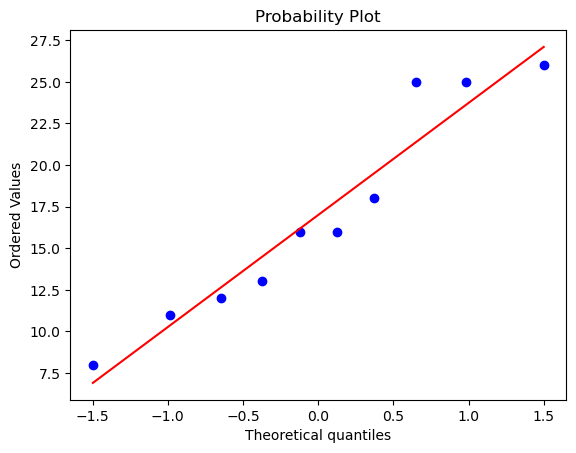

In [4]:
# Check the normality of the difference
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data['d'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data['d'], dist="norm", plot=plt)
plt.show()

> Now that we know that the data are normally distributed, we can use the t-test to evaluate the following hypothesis:
> $$ H_0: \mu_d = 0 $$
> $$ H_1: \mu_d > 0 $$
> The t-test statistic is:
> $$ t_0 = \frac{\bar{d}}{s_d/\sqrt{n}} $$
> where $\bar{d}$ is the sample mean of the differences, $s_d$ is the sample standard deviation of the differences and $n$ is the number of observations.

In [5]:
# Compute the t-statistic and the corresponding p-value
n = len(data['d'])  # number of samples
df = n - 1          # degrees of freedom

t0 = np.mean(data['d']) / (data['d'].std() / np.sqrt(n))
print('t-statistic: %.3f' % t0)

# Compute the p-value
p_value_t0 = 1 - stats.t.cdf(np.abs(t0), df)
print('p-value: %.3f' % p_value_t0)


t-statistic: 8.384
p-value: 0.000


> Alternatively, we can use the `ttest_1samp` function from the `scipy.stats` module.

In [6]:
# Perform the t-test on the difference using the stats.ttest_1samp function
t0_stats, p_value_t0_stats = stats.ttest_1samp(data['d'], popmean = 0, alternative='greater')
print('t-statistic from stats.ttest_1samp: %.3f' % t0_stats)
print('p-value from stats.ttest_1samp: %.3f' % p_value_t0_stats)

t-statistic from stats.ttest_1samp: 8.384
p-value from stats.ttest_1samp: 0.000


> Alternatively, we can directly use the `ttest_rel` function from the `scipy.stats` module on the original data (without computing the differences).

In [7]:
# Alternatively, you can perform a paired t-test using the stats.ttest_rel function
t0_stats_trel, p_value_t0_stats_trel = stats.ttest_rel(data['before'], data['after'], alternative='greater')
print('t-statistic from stats.ttest_rel: %.3f' % t0_stats_trel)
print('p-value from stats.ttest_rel: %.3f' % p_value_t0_stats_trel)

t-statistic from stats.ttest_rel: 8.384
p-value from stats.ttest_rel: 0.000


### Point b

Can we state that (95%) the program yielded a mean weigth reduction higher than 10 lbs?

> ### Solution
>
> We can use the same t-test as in point a, but with the following hypothesis:
> $$ H_0: \mu_d = \Delta_0 $$
> $$ H_1: \mu_d > \Delta_0 $$
> The t-test statistic is still:
> $$ t_0 = \frac{\bar{d} - \Delta_0}{s_d/\sqrt{n}} $$
> where $\bar{d}$ is the sample mean of the differences, $s_d$ is the sample standard deviation of the differences, $n$ is the number of observations and $\Delta_0$ is the hypothesized value of the mean difference.

In [8]:
# Answer to point b
CL = 0.95       # confidence level
alpha = 1 - CL  # significance level

delta0 = 10     # null hypothesis
t0_delta0_stats, p_value_t0_delta0_stats = stats.ttest_1samp(data['d'], popmean = delta0, alternative = 'greater')
print('t-statistic from stats.ttest_1samp: %.3f' % t0_delta0_stats)
print('p-value from stats.ttest_1samp: %.4f' % p_value_t0_delta0_stats)

t-statistic from stats.ttest_1samp: 3.452
p-value from stats.ttest_1samp: 0.0036


> Let's plot the confidence interval for the mean difference.

Lower bound of the one-sided confidence interval: 13.283


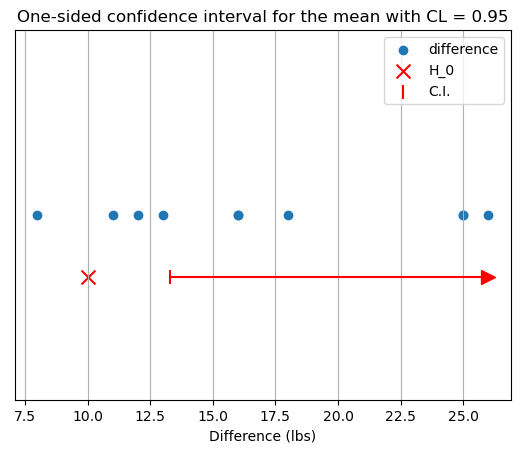

In [10]:
# Calculate the lower bound of the one-sided confidence interval
t_alpha = stats.t.ppf(1 - alpha, df)
CI_lower = data['d'].mean() - t_alpha * data['d'].std() / np.sqrt(n)
print('Lower bound of the one-sided confidence interval: %.3f' % CI_lower)

# Visualize the confidence interval on a dot plot
plt.title('One-sided confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data['d'], np.zeros(n), label='difference')
# plot H0
plt.scatter(delta0, -0.01, label='H_0', color='r', marker='x', s=100)
# plot the confidence interval
plt.scatter(CI_lower, -0.01, label='C.I.', color='r', marker='|', s=100)
plt.plot([CI_lower, np.max(data['d'])], [-0.01, -0.01], color='r')
plt.scatter(np.max(data['d']), -0.01, color='r', marker='>', s=100)
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('Difference (lbs)')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()


### Point c

Design a two-sided confidence interval at 95% on the weight difference.

> ### Solution
>
> We can use the same t-test as in point a, but with the following hypothesis:
> $$ H_0: \mu_d = 0 $$
> $$ H_1: \mu_d \neq 0 $$
> The t-test statistic is still:
> $$ t_0 = \frac{\bar{d}}{s_d/\sqrt{n}} $$
> And the corresponding confidence interval is:
> $$ \bar{d} - t_{\alpha/2, n-1} \frac{s_d}{\sqrt{n}} \leq \mu_d \leq \bar{d} + t_{\alpha/2, n-1} \frac{s_d}{\sqrt{n}} $$

In [11]:
# Answer to point c
CL = 0.95       # confidence level
alpha = 1 - CL  # significance level

t_alpha2 = stats.t.ppf(1 - alpha / 2, df)
CI = [data['d'].mean() - t_alpha2 * data['d'].std() / np.sqrt(n), 
        data['d'].mean() + t_alpha2 * data['d'].std() / np.sqrt(n)]
print('Confidence interval: (%.3f, %.3f)' % (CI[0], CI[1]))

Confidence interval: (12.413, 21.587)


In [12]:
# Alternatively, you can use the stats.t.interval function
CI = stats.t.interval(CL, df, loc=data['d'].mean(), scale=data['d'].std() / np.sqrt(n))
print('Confidence interval: (%.3f, %.3f)' % (CI[0], CI[1]))

Confidence interval: (12.413, 21.587)


> Let's plot the confidence interval for the mean difference.

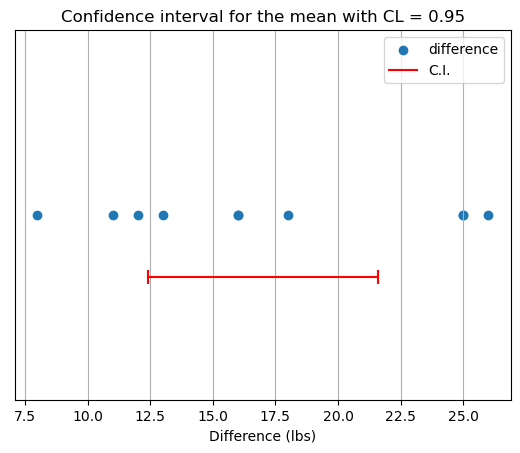

In [13]:
# Visualize the confidence interval on a dot plot
plt.title('Confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data['d'], np.zeros(n), label='difference')
# plot the confidence interval alonside the dot plot
plt.scatter(CI[0], -0.01, color='r', marker='|', s=100)
plt.plot([CI[0], CI[1]], [-0.01, -0.01], color='r', label='C.I.')
plt.scatter(CI[1], -0.01, color='r', marker='|', s=100)
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('Difference (lbs)')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

# F-test (equality of variances)

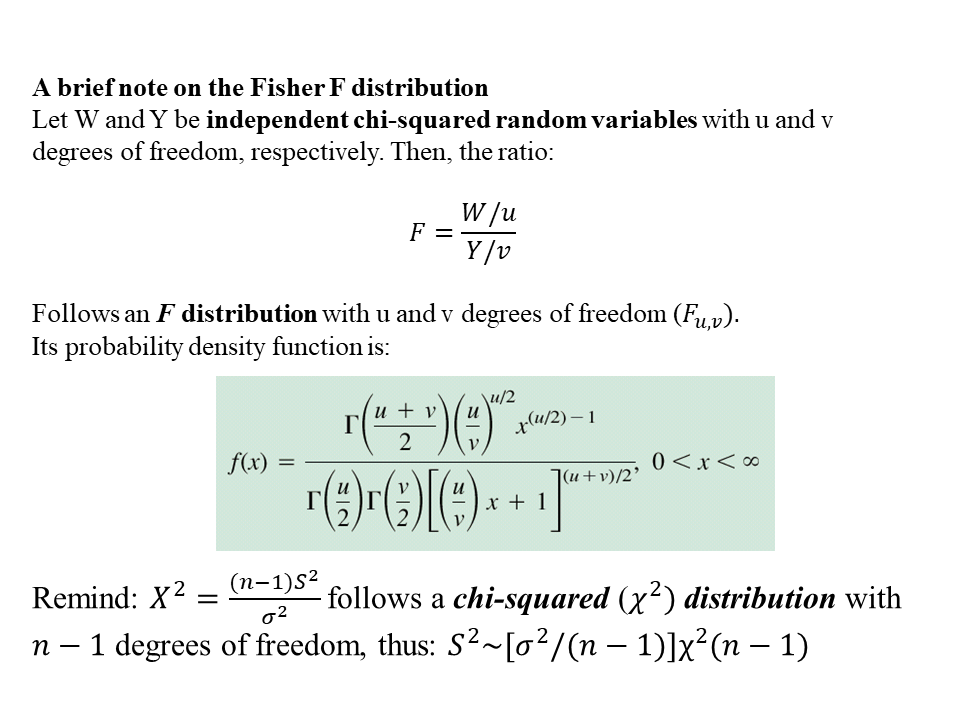

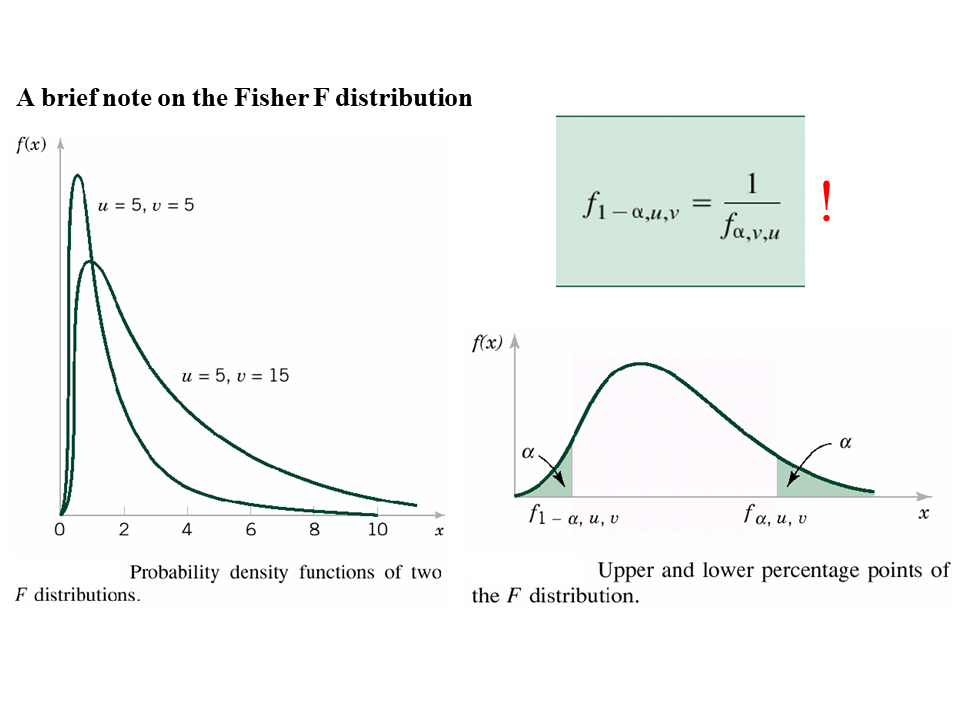

The F-test

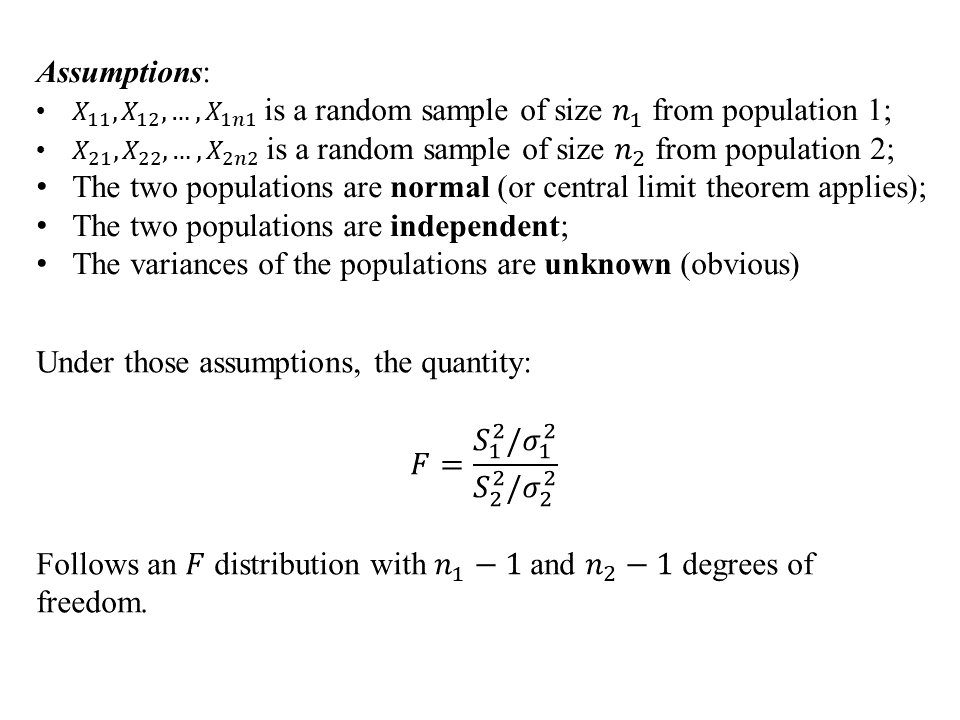

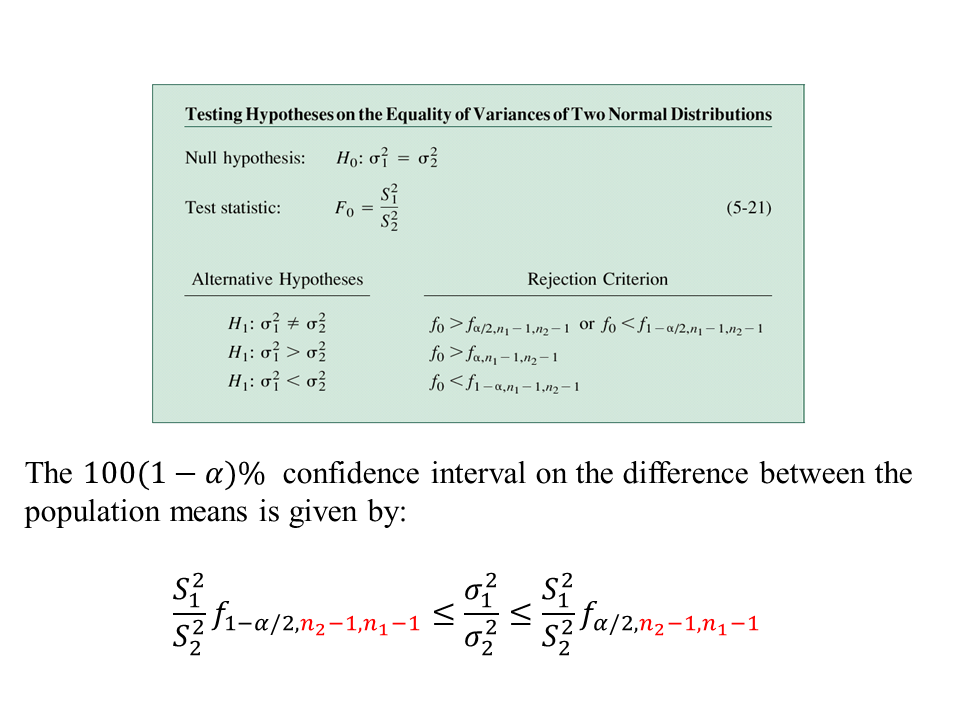

## EXERCISE 4

We want to evaluate the resistance of resistors provided by two different suppliers. The data is stored in the file `ESE2_ex4.csv`.

a) Design a boxplot to compare the two samples and estimate the major descriptive statistics

b) What can we infer about the mean resistance of the resistors provided by the two different suppliers?

c) Compute the Type II error expression in the variance equality test and compute the test power when the true variance of the first supplier is 1.5 times larger than the one of the second supplier

In [14]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE2_ex4.csv')

# Inspect the dataset
data.head()

,supp1,supp2
0,96.8,106.8
1,100.0,103.7
2,99.9,104.0
3,98.6,102.8
4,101.2,107.2


> Let's inspect the data.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   supp1   25 non-null     float64
 1   supp2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


> The dataset contains NaN values because the number of observations is different for each supplier. We need to remove them.

In [16]:
# Let's split the dataset into two dataframes, one for each supplier
data1 = data['supp1']
data2 = data['supp2']

# and remove the nan values from data1
data1 = data1.dropna()

### Point a

Design a boxplot to compare the two samples and estimate the major descriptive statistics.

> ### Solution
> Use the `boxplot` function from `matplotlib.pyplot` to plot the boxplot. 

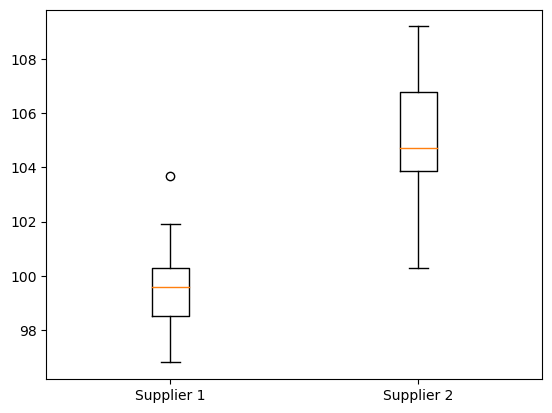

In [17]:
# Answer to point a
plt.boxplot([data1, data2], labels=['Supplier 1', 'Supplier 2'])
plt.show()

> Use the `describe` function from `pandas` to compute the descriptive statistics.

In [18]:
data.describe()

,supp1,supp2
count,25.000000,35.000000
mean,99.576000,105.068571
std,1.528965,1.962557
min,96.800000,100.300000
25%,98.500000,103.850000
50%,99.600000,104.700000
75%,100.300000,106.800000
max,103.700000,109.200000


### Point b

What can we infer about the mean resistance of the resistors provided by the two different suppliers?

> ### Solution
> First we need to check the assumptions: 
> + Normality
> + Independence (we assume it is ok, for now) - within and between
> + Other? Outliers?

> Let's check the normality with the Shapiro-Wilk test.

p-value for Shapiro-Wilk test for supplier 1: 0.523
p-value for Shapiro-Wilk test for supplier 2: 0.722


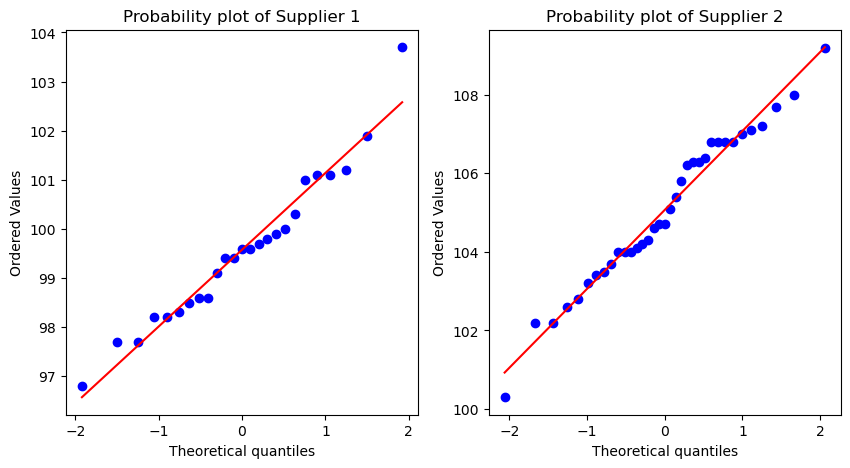

In [19]:
# Answer to point b
n1 = len(data1) # number of observations for supplier 1
n2 = len(data2) # number of observations for supplier 2

# Let's check the assumptions
# Normality
# Shapiro-Wilk test
_, p_value_SW_1 = stats.shapiro(data1)
_, p_value_SW_2 = stats.shapiro(data2)
print('p-value for Shapiro-Wilk test for supplier 1: %.3f' % p_value_SW_1)
print('p-value for Shapiro-Wilk test for supplier 2: %.3f' % p_value_SW_2)

# QQ-plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
stats.probplot(data1, plot=ax[0])
ax[0].set_title('Probability plot of Supplier 1')
stats.probplot(data2, plot=ax[1])
ax[1].set_title('Probability plot of Supplier 2')
plt.show()

> We want to compare the means of two populations.
> Variances are unknown, thus there are two possible situations:
> - Equal (unknown) variances
> - Different (unknown) variances
> 
>
> **First step: hypothesis test on the equality of variances** 
>
> Null hypothesis: the two variances are equal
> $$H_0: \sigma_1^2 = \sigma_2^2$$
> Alternative hypothesis: the two variances are different
> $$H_1: \sigma_1^2 \neq \sigma_2^2$$
>
> This hypothesis test is equivalent to:
> 
> $$H_0: \frac{\sigma_1^2}{\sigma_2^2} = 1$$
>
> $$H_1: \frac{\sigma_1^2}{\sigma_2^2} \neq 1$$
>
> We can use the F-test to test the equality of variances. The test statistic is:
> $$F_0 = \frac{s_1^2}{s_2^2}$$
> 
> The corresponding confidence interval is:
> $$\frac{s_1^2}{s_2^2} F_{\alpha/2, n_2-1, n_1-1} \leq \frac{\sigma_1^2}{\sigma_2^2} \leq \frac{s_1^2}{s_2^2} F_{1-\alpha/2, n_2-1, n_1-1}$$

In [20]:
CL = 0.95       # Confidence level
alpha = 1 - CL  # Significance level

# Test the equality of variances
# F-test
F0 = data1.var()/data2.var()
df1 = n1 - 1 # degrees of freedom for supplier 1
df2 = n2 - 1 # degrees of freedom for supplier 2
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.2f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

Confidence interval on the ratio of variances (CL = 0.95): [0.293, 1.323]


> There is no statistical evidence to state that the two variances are different (accept null hypothesis), because the interval includes 1. 


> Let's plot the distribution under the null hypothesis, the rejection region and the test statistic.

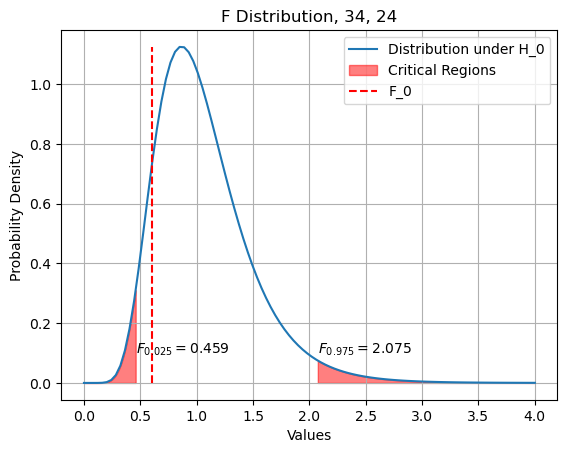

In [21]:
# plot the cumulative probability
x = np.linspace(0, 4, 100)
plt.plot(x, stats.f.pdf(x, df1, df2), label='Distribution under H_0')

# Adding Title, Labels and Grid
plt.title("F Distribution, %d, %d" % (df2, df1))
plt.xlabel("Values")
plt.ylabel("Probability Density")
plt.grid(True)      

# Filling the Probability Area
F_1 = stats.f.ppf(alpha/2, df1, df2)
F_2 = stats.f.ppf(1-alpha/2, df1, df2)
x_fill = np.linspace(0, F_1, 100)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5)
x_fill = np.linspace(F_2, np.max(x), 100)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Critical Regions')
# Add text to the plot with the chi2 values and centering the text
plt.text(F_1, 0.1, r'$F_{%.3f} = {%.3f}$' % (alpha/2, F_1), fontsize=10)
plt.text(F_2, 0.1, r'$F_{%.3f} = {%.3f}$' % (1-alpha/2, F_2), fontsize=10)

# Plot the test statistic F0
plt.vlines(F0, 0, np.max(stats.f.pdf(x, df1, df2)), color='r', linestyle='--', label='F_0')

# Showing Plot
plt.legend()
plt.show()

> Let's compute the p-value corresponding to the test statistic.

In [22]:
# Compute the p-value
p_value_F0 = 2 * stats.f.cdf(F0, df1, df2)

print('p-value for F-test for equal variances: %.3f' % p_value_F0)

p-value for F-test for equal variances: 0.205


> We can also use the Chi-squared statistic to compute the confidence interval for the two standard deviations.
>
> Rember:
> $$\frac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}}$$

In [23]:
# Compute the 95% confidence interval on the individual standard deviation
CI_sigma_1 = np.sqrt([(df1 * data1.var())/stats.chi2.ppf(1-alpha/2, df1), (df1 * data1.var())/stats.chi2.ppf(alpha/2, df1)])
CI_sigma_2 = np.sqrt([(df2 * data2.var())/stats.chi2.ppf(1-alpha/2, df2), (df2 * data2.var())/stats.chi2.ppf(alpha/2, df2)])
print('Confidence interval on the standard deviation for supplier 1 (CL = %.2f): [%.3f, %.3f]' % (CL, CI_sigma_1[0], CI_sigma_1[1]))
print('Confidence interval on the standard deviation for supplier 2 (CL = %.2f): [%.3f, %.3f]' % (CL, CI_sigma_2[0], CI_sigma_2[1]))


Confidence interval on the standard deviation for supplier 1 (CL = 0.95): [1.194, 2.127]
Confidence interval on the standard deviation for supplier 2 (CL = 0.95): [1.587, 2.571]


> Now that we have verified the equality of variances, we can perform the t-test (with equal variances). So we can use the `ttest_ind` function from `scipy.stats` and set the `equal_var` parameter to `True`.
>
> Remember the formula of the two-sample t-test: 
> $$T = \frac{(\bar{X}_1 - \bar{X}_2)-(\mu_1 - \mu_2)}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$
>
> where:
> $$S_p^2 = \frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1+n_2-2}$$

In [24]:
t0, p_value_t0 = stats.ttest_ind(data1, data2, equal_var=True)
print('t-test: t0 = %.3f' % t0)
print('p-value for t-test: %.3f' % p_value_t0)

t-test: t0 = -11.680
p-value for t-test: 0.000


### Point c

Compute the Type II error expression in the variance equality test and compute the test power when the true variance of the first supplier is 1.5 times larger than the one of the second supplier.

> ### Solution
> The Type II error is the probability of accepting the null hypothesis when it is false.
> $$\beta = Pr(\text{accept } H_0 \text{ when } H_1 \text{ is true})$$
>
> Let's expand the formula for the F-test:
> $$\beta = Pr \left(F_{1-\alpha/2,n_1-1,n_2-2} \leq \frac{s_1^2}{s_2^2} \leq F_{\alpha/2,n_1-1,n_2-2} \mid \frac{\sigma_1^2}{\sigma_2^2} = \delta \neq 1 \right)$$
>
> If we multiply all the terms by $\sigma_2^2 / \sigma_1^2$ we get:
> $$ \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \sim F_{n_1-1,n_2-2}$$
>
> If we substitute $\sigma_2^2 / \sigma_1^2$ with the ratio we want to test, we get:
> $$ \beta = Pr \left( \frac{F_{1-\alpha/2,n_1-1,n_2-2}}{1.5} \leq \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{\alpha/2,n_1-1,n_2-2}}{1.5} \right)$$
>
> Rearranging the terms we get:
> $$ \beta = Pr \left( \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{\alpha/2,n_1-1,n_2-2}}{1.5} \right) - Pr \left( \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{1-\alpha/2,n_1-1,n_2-2}}{1.5} \right)$$

In [26]:
# Answer to point c
ratio = 1.5 # ratio between the variances of the two samples
beta = stats.f.cdf(stats.f.ppf(1-alpha/2, df1, df2)/ratio, df1, df2) - stats.f.cdf(stats.f.ppf(alpha/2, df1, df2)/ratio, df1, df2)
print('Power of the test: %.3f' % (1-beta))

Power of the test: 0.191


## EXERCISE 5

A study is aimed at investigating the microbial spore content in orange jouce pastourized via high pressure processing under two different pressure and temperature condition, namely condition 1 and condition 2.
An index that represents the microbial content after the process was measured for the two different conditions (data table in attached file 'ESE2_ex5.csv')

a) Design a boxplot to compare the two conditions and estimate the major descriptive statistics

b) Compute the confidence interval on the variance ratio at 95%

c) Compute a 99% confidence interval on the difference between the two means (highligh the necessary assumptions). What conclusion can we draw?

In [27]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE2_ex5.csv')

# Inspect the dataset
data.head()

,cond1,cond2
0,19.8,14.9
1,18.5,12.7
2,17.6,11.9
3,16.7,11.4
4,16.7,10.1


In [28]:
# The dataset contains nan values because the number of observations is different for each supplier
# Let's split the dataset into two dataframes, one for each supplier
data1 = data['cond1']
data2 = data['cond2']

# and remove the nan values from data2
data2 = data2.dropna()

n1 = len(data1) # number of observations for supplier 1
n2 = len(data2) # number of observations for supplier 2

df1 = n1 - 1    # degrees of freedom for supplier 1
df2 = n2 - 1    # degrees of freedom for supplier 2

### Point a

Design a boxplot to compare the two samples and estimate the major descriptive statistics

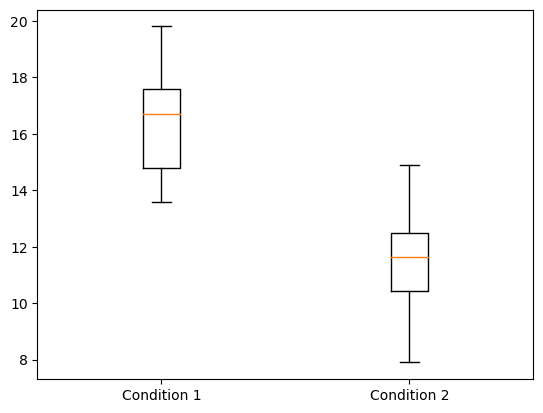

In [29]:
# Answer to point a
plt.boxplot([data1, data2], labels=['Condition 1', 'Condition 2'])
plt.show()

In [30]:
# make a dataframe with the major descriptive statistics and Q1, Q3
descriptive_stats = pd.DataFrame({'Supplier 1': [data1.mean(), data1.std(), data1.var(), data1.min(), data1.quantile(0.25), data1.median(), data1.quantile(0.75), data1.max()], 
                                    'Supplier 2': [data2.mean(), data2.std(), data2.var(), data2.min(), data2.quantile(0.25), data2.median(), data2.quantile(0.75), data2.max()]},
                                    index=['Mean', 'StDev', 'Var', 'Min', 'Q1', 'Median', 'Q3', 'Max'])

print(np.round(descriptive_stats,3))

        Supplier 1  Supplier 2
Mean        16.356      11.483
StDev        2.069       2.370
Var          4.283       5.618
Min         13.600       7.900
Q1          14.800      10.425
Median      16.700      11.650
Q3          17.600      12.500
Max         19.800      14.900


### Point b

Compute the confidence interval on the variance ratio at 95%.

p-value Shapiro-Wilk test for condition 1: 0.865
p-value Shapiro-Wilk test for condition 2: 0.991


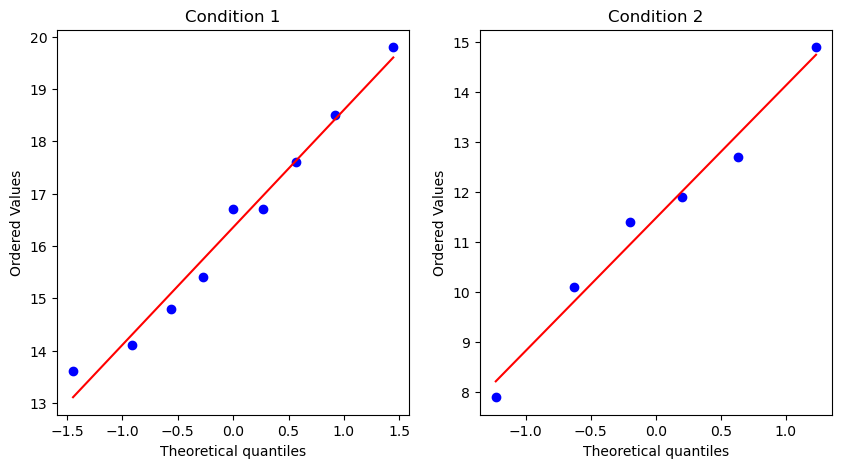

In [31]:
# Answer to point b
CL = 0.95      # Confidence level
alpha = 1 - CL # Significance level

# Check the assumptions
_, p_value_SW_1 = stats.shapiro(data1)
_, p_value_SW_2 = stats.shapiro(data2)
print('p-value Shapiro-Wilk test for condition 1: %.3f' % p_value_SW_1)
print('p-value Shapiro-Wilk test for condition 2: %.3f' % p_value_SW_2)

# QQ-plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
stats.probplot(data1, plot=ax[0])
ax[0].set_title('Condition 1')
stats.probplot(data2, plot=ax[1])
ax[1].set_title('Condition 2')
plt.show()

In [32]:
# Compute the CI on the variance ratio
F0 = data1.var() / data2.var()
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1 - alpha/2, df2, df1)]
print('The confidence interval on the variance ratio is: [%.3f, %.3f]' % (CI[0], CI[1]))


The confidence interval on the variance ratio is: [0.113, 3.673]


In [33]:
# Compute the corresponding p-value
p_value = 2 * stats.f.cdf(F0, df1, df2)
print('The p-value is: %.3f' % p_value)

The p-value is: 0.697


### Point c

Compute the 99% confidence interval on mean difference.

In [34]:
# Answer to point c
CL = 0.99      # Confidence level
alpha = 1 - CL # Significance level

# Compute the pooled standard deviation
s_p = np.sqrt((data1.var() * df1 + data2.var() * df2) / (df1 + df2))

# Compute the CI on the difference of means
CI = [data1.mean() - data2.mean() - stats.t.ppf(1 - alpha/2, df1 + df2) * s_p * np.sqrt(1/n1 + 1/n2),
        data1.mean() - data2.mean() + stats.t.ppf(1 - alpha/2, df1 + df2) * s_p * np.sqrt(1/n1 + 1/n2)]

print('The confidence interval on the difference of means is: [%.3f, %.3f]' % (CI[0], CI[1]))

The confidence interval on the difference of means is: [1.395, 8.349]


In [ ]:
# Compute the corresponding p-value
p_value = 2 * stats.t.cdf(-abs(data1.mean() - data2.mean()) / (s_p * np.sqrt(1/n1 + 1/n2)), df1 + df2)
print('The p-value is: %.3f' % p_value)

# to conclude...

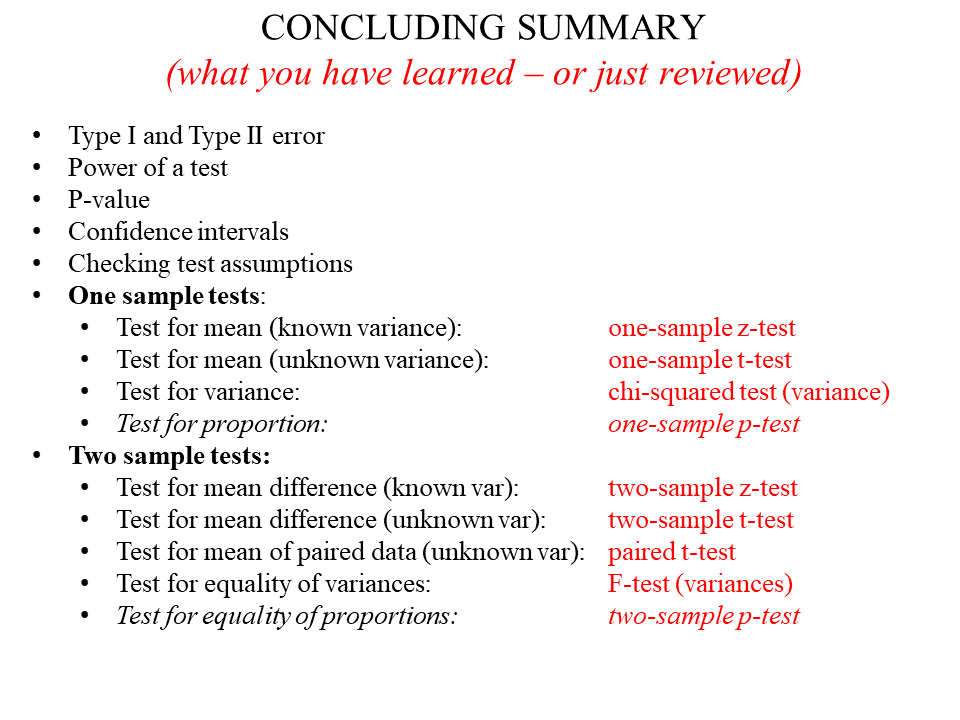